<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Praktikum Metode Komputasi-5</p>
    <h1> Array dan Gridding Sederhana dalam Python</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Memperkenalkan aplikasi array dalam Python untuk Geofisika</li>
        <li>Keluaran: Mahasiswa dapat memahami tentang 2D array dan penggunaannya dalam Geofisika</li>
        <li>Pertemuan: 5</li>
        <li>Waktu/Tempat: Jumat, 18 April 2020/ Youtube</li>
    </ul>
</div>

## 1. Mendalami `meshgrid`
Kita akan mencoba mempraktekkan mengenai grid seperti pada ilustrasi di bawah ini (sumber: [python-course.eu](http://python-course.eu)). Fungsi `meshgrid` berguna untuk membuat titik teratur yang didapatkan dari 2 buah array 1 Dimensi. Maksudnya gimana? bisa dilihat di bawah ini.

Misalkan kita memiliki dua buah array 1 D:

In [6]:
import numpy as np

x0 = np.array([1,2,3,4])
y0 = np.array([2,4,6,8])

print("x0=", x0)
print("y0=", y0)

x0= [1 2 3 4]
y0= [2 4 6 8]


Oke sebelum mulai memakai `meshgrid` ada baiknya kita coba buka `help` atau bantuannya dulu:

In [7]:
help(np.meshgrid)

Help on function meshgrid in module numpy:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  Please note that
  

Oke mari kita coba menggunakan `meshgrid` dan kita lihat apa yang kita dapatkan :D

In [8]:
X0, Y0 = np.meshgrid(x0, y0)
print("X0 = \n", X0, "\nX0 shape =", X0.shape)
print("\nY0 =\n", Y0, "\nX0 shape =", Y0.shape)

X0 = 
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 
X0 shape = (4, 4)

Y0 =
 [[2 2 2 2]
 [4 4 4 4]
 [6 6 6 6]
 [8 8 8 8]] 
X0 shape = (4, 4)


Dari contoh di atas kita mendapatkan matriks atau Array 2D masing-masing untuk `X0` dan `Y0`. Apabila teman-teman cermati maka menimbulkan tanda tanya hehe, kok bisa ya jadi seperti itu?

Nah untuk itu kita bisa mencoba menggambarkan apa yang terjadi menggunakan matplotlib. Disini saya menggunakan `nol_palsu` maksudnya untuk digunakan sebagai koordinat di x=0 untuk `y0` dan y=0 untuk `x0`, jadi hanya sebagai bantuan visualisasi saja. Kita akan bandingkan hasil plot masing-masing untuk `x0` `y0` dan `X0` `Y0`.

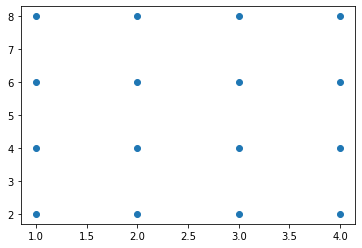

In [48]:
import matplotlib.pyplot as plt #import matplotlib untuk mengeplot

nol_palsu = np.array([0,0,0,0]) #data buatan hanya untuk visualisasi

plt.scatter(X0, Y0) #1. plot hasil meshgrid
#plt.scatter(x0, nol_palsu) # 2. plot array x0
#plt.scatter(nol_palsu, y0, label="nol") # 3. plot array y0
plt.show()

Nah dari gambar di atas seharusnya sudah mulai paham, kalo belum bisa lihat video youtube karena ada penjelasan disitu. Jadi maksudnya adalah titik biru merupakan hasil `meshgrid` yang membentuk titik-titik teratur yang berdasarkan dari `x0` dan `y0` kita tadi. Salah satu penjelasan yang bagus dapat kita dapatkan di web [python-course.eu](https://www.python-course.eu/matplotlib_contour_plot.php). Dan beginilah penggambarannya, akan kita ulangi sekali lagi dengan contoh dari web ini :D

<img src="https://www.python-course.eu/images/creating_a_meshgrid.png" width=500px title="how meshgrid works (python-course.eu">


Dari gambar di atas kita dapat melihat bahwa untuk `xlist` nilai akan diduplikasi menjadi 4 baris, mengapa? karena menyesuaikan jumlah anggota dari `ylist` yang ada 4 (-3,-1,1,3), sedangkan `ylist` akan ditranspose dulu menjadi "berdiri" kemudian diduplikasi 3 kali menyesuaikan jumlah anggota `xlist`. Nah apabila digabungkan maka membentuk koorinat yang bentuknya adalah 3x4, masing-masing dari jumlah anggota `xlist` dan `ylist`.

Oke mari kita praktekkan :D

In [44]:
xlist = np.linspace(-3, 3, 3)
ylist = np.linspace(-3, 3, 4)
Xlist, Ylist = np.meshgrid(xlist, ylist)

In [49]:
print("XList = \n", Xlist, "\nXlist shape =", Xlist.shape)
print("\nYlist =\n", Ylist, "\nXlist shape =", Ylist.shape)

XList = 
 [[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]] 
Xlist shape = (4, 3)

Ylist =
 [[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]] 
Xlist shape = (4, 3)


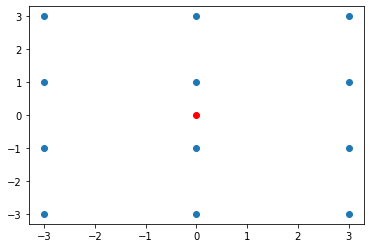

In [52]:
plt.scatter(Xlist, Ylist)
plt.scatter(0,0, color="red")
plt.show()

## 2. Membuat kontur sederhana
Pada kasus ini saya membuat 2D array baru berupa nilai jarak dari titik (0,0), dengan rumus jarak seperti biasanya.

In [53]:
Jarak = np.sqrt((Xlist-0)**2 + (Ylist-0)**2)

Mengapa kita membuat `Jarak`? Karena kita akan menggunakan nilai tersebut untuk membuat kontur yang nilainya merupakan jarak setiap titik terhadap koordinat (0,0).

Nah untuk membuat kontur kita membutuhkan koordinat teratur (grid), makanya tadi kita membuat grid dulu menggunakan `meshgrid`. Fungsi untuk mengeplot kontur sendiri ada beberapa di Python, bisa menggunakan `contour` ataupun `contourf`.

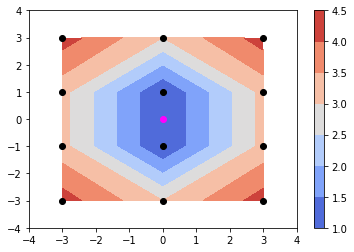

In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm #color map

plt.xlim(-4,4) #batas gambar untuk sumbu x
plt.ylim(-4,4) #batas gambar untuk sumbu y

plt.contourf(Xlist,Ylist,Jarak, cmap=cm.coolwarm) # plot kontur

plt.colorbar() # plot skala warna
plt.scatter(Xlist,Ylist, color="black") #plot titik data
plt.scatter(0,0, color="magenta")
plt.show()

## 3. Membuat sayatan dari kontur
Nah di bawah ini kita akan memanfaatkan numpy untuk membuat sayatan barat-timur dari peta di atas. Kita akan memilih sayatan di y=-1. Bagaimana caranya?

Caranya adalah mengambil data `Xlist` dan `Ylist` pada nilai y=-1 memanfaatkan indeksing pada array. Dapat dilihat pada gambar di atasnya lagi tentang konsep meshgrid. Dari gambar di atas maka kita perlu mengambil koordinat (-3,-1), (0,-1), dan (3,-1). Koordinat x yang kita butuhkan berarti adalah (-3, 0, 3) sedangkan oordinat y yang dibutuhkan adalah (-1,-1,-1). Nah kita tinggal cocokkan kedua nilai tersebut dengan indeks dari array `Xlist` dan `Ylist`.

Kita coba lihat nilai `Xlist`:
```python
Xlist = 
 [[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]] 
```
Nah kita pasti bingung, terus kita harus ambil yang mana ya? Karena semuanya sama hahahahah. Okee kita bisa ambil baris dimana nilai y=-1. Untuk itu kita lihat dahulu saja untuk `Ylist`.

```python
Ylist =
 [[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]] 
```

Nah disini jelas bahwa kita perlu mengambil baris kedua, atau indeks 1. Untuk itu di `Xlist` yang kita ambil adalah indeks 1 juga.

Jadinya seperti ini:
```python

Xlist[1,:]
```
dan
```python
Ylist[1,:]
```

Maksudnya adalah kita mengambil baris kedua (indeks dimulai dari 0), dari baris kedua tersebut kita ambil semua bagiannya (`:`). Masih ingat? heheeh

Untuk mengeplotnya pakailah fungsi:
```python
plt.plot(Xlist[1,:], Ylist[1,:], color="blue")
```

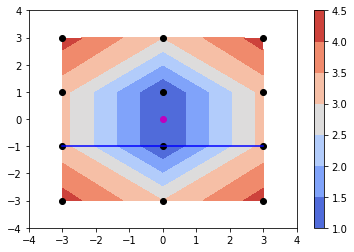

In [67]:
plt.xlim(-4,4) #batas gambar untuk sumbu x
plt.ylim(-4,4) #batas gambar untuk sumbu y
plt.contourf(Xlist,Ylist,Jarak, cmap=cm.coolwarm) # plot kontur
plt.colorbar(cmap=cm.coolwarm) # plot skala warna


plt.scatter(Xlist,Ylist, color="black") #plot titik data
plt.scatter(0,0, color="m")

# Nah disini kita masukkan plotnya.
plt.plot(Xlist[1,:], Ylist[1,:], color="blue")#plot garis

Nah pada gambar di atas kita sudah berhasil mengeplot garis sayatan berwarna biru, untuk menyayat timur-barat pada y=-1.

Nah dibawah ini kita akan ambil nilai dari jaraknya untuk grafik sayatannya, caranya simpel. Kita tinggal mengambil nilai `Jarak` dengan indeks sama dengan saat kita mengambil `Xlist` dan `Ylist` yaitu:

```python
Jarak[1,:]
```

Nah selanjutnya kita plot sayatannya, karena pada sayatan barat-timur, maka kita hanya perlu nilai `Xlist` saja sebgai sumbu X.

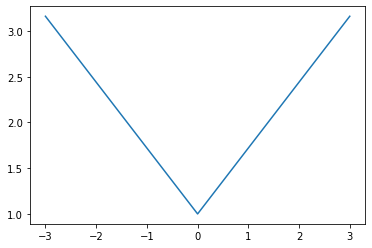

In [19]:
plt.plot(Xlist[1,:], Jarak[1,:])
plt.show()

Nah agar lebih jelas kita bisa sandingkan antara kontur dengan grafik di atas menggunakan `subplot` dari `matplotlib`.

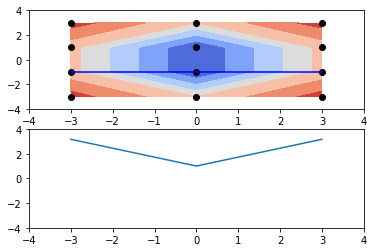

In [71]:
plt.subplot(2,1,1)
plt.xlim(-4,4) #batas gambar untuk sumbu x
plt.ylim(-4,4) #batas gambar untuk sumbu y
plt.contourf(Xlist,Ylist,Jarak, cmap=cm.coolwarm) # plot kontur
plt.scatter(Xlist,Ylist, color="black") #plot titik data
# Nah disini kita masukkan plotnya.
plt.plot(Xlist[1,:], Ylist[1,:], color="blue")#plot garis


plt.subplot(2,1,2)
plt.plot(Xlist[1,:], Jarak[1,:])
plt.xlim(-4,4) #batas gambar untuk sumbu x
plt.ylim(-4,4) #batas gambar untuk sumbu y

plt.show()


Selamat kita sudah berhasil, tampilanya masih aneh tapi sementara seperti ini dulu saja :D

Sedikit penjelasan mengenai `subplot`:
Fungsi ini berguna untuk membuat plot yang berisi beberapa plot. Pada fungsi di atas terdapat dua baris dan 1 kolom plot, oleh karena itu di `subplot` kita masukkan dua angka pertama yaitu 2 dan 1 yang masing-masing mewakili jumlah baris dan kolom. Angka terakhir merupakan urutan dari plotnya.

![sayatan 2](./material/contoh5.png)

## 4. Contoh aplikasinya di Geofisika

Nah disini kita menggunakan contoh pada penghitungan nilai gravitasi di suatu wilayah yang disebabkan oleh adanya benda berbentuk bola dengan jari-jari, densitas, koordinat, dan kedalaman tertentu. Contoh disini saya ambil dari modul Pak Wiwit tentang kuliah Metkom, selengkapnya disini: [Modul Kuliah Metode Komputasi](https://github.com/maswiet/Kuliah_Metode_Komputasi).

![bola](./material/bola.png)

Rumus untuk menghitung pengaruh dari bola tersebut adalah:

<img src="https://latex.codecogs.com/svg.latex?\Large&space;\vec{g}(F_1)=-\gamma \frac{\frac{4}{3} \pi a^2 \rho}{R^2}\hat{r}" title="\Large x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}" />


Tenang tidak usah panik hehe, rumusnya tinggal kita pakai saja dan kita masuk-masukkan nilai parameternya.

### 4.1 Mengimpor modul dan membuat konstanta-konstanta yang diperlukan

In [23]:
#```--------Program menghitung gaya tarik gravitasi-------------------```
#```               benda berbentuk bola                              ```
#```------------------------------------------------------------------```
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

gamma = 6.6E-11 # konstanta gravitasi
si2mg = 1.0E5 # konversi satuan
pi = 3.14159265 # phi
km2m = 1e3 # konversi satuan
ierror = 0

Selanjutnya kita membuat fungsinya sesuai dengan rumus di atas:

In [24]:
def bola(xq,yq,zq,a,rho,xp,yp,zp):
    #``` titik pengamatan terletak pada koordinat (xp,yp,zp), sementara pusat bola adalah di (xq,yq,zq). Jari-jari bola adalah a
    #``` dan densitas adalah rho. Densitas satuannya kg/m^3, jarak dalam km
    
    rx = xp - xq # jarak pengamat dan bola di sumbu x
    ry = yp - yq # jarak pengamat dan bola di sumbu y
    rz = zp - zq# jarak pengamat dan bola di sumbu z
    
    # menghitung jarak menggunakan persamaan Pythagoras
    r = math.sqrt(math.pow(rx,2)+math.pow(ry,2)+math.pow(rz,2))
    
    # apabila jarak=0 maka dibuat fungsi error
    if r == 0:
        print("R-nya nol, ubah kedalaman!")
    
    #jarak pangkat 3
    r3 = math.pow(r,3)
    
    # menghitung total mass
    tmass = 4.0 * pi * rho * (math.pow(a,2))/3
    
    # menghitung nilai percepatan gravitasi pada masing-masing komponen
    gx = -gamma * tmass * rx/r3
    gy = -gamma * tmass * ry/r3
    gz = -gamma * tmass * rz/r3
    
    # konversi satuan
    gx = gx * si2mg * km2m
    gy = gy * si2mg * km2m
    gz = gz * si2mg * km2m
    
    return gx, gy, gz

Selanjutnya kita gunakan looping untuk menghitung nilai `g`. Sebelumnya kita membuat persebaran data pengukuran di pengamat atau membuat grid seperti tadi, menggunakan:

```python
x = np.linspace(-50,50,100)
y = np.linspace(-50,50,100)
X,Y = np.meshgrid(x,y)
```

Pada fungsi di atas kita membuat persebaran koordinat teratur dari nilai -50 sampai 50 dengan jumlah data 100. Oleh karena itu maka apabila dibuat grid menggunakan `meshgrid` maka ukuran `X`, `Y` adalah 100x100.

Setelah itu kita membuat array yang berisi 0 dengan ukuran 100x100 yang nanti akan kita isi dengan nilai `gz` menggunakan:

```python
G=np.zeros((100,100))
```

Langkah terakhir adalah melakukan `looping` dari 0-100 pada masing-masing indeks `i` dan `j` untuk menghitung nilai `G`. Ini dicermati pelan-pelan gapapa hehe :D. Nah nilai gz yang kemudian kita masukkan di matriks `G` yang tadi semula berisi 0.

In [25]:
x = np.linspace(-50,50,100)
y = np.linspace(-50,50,100)
X,Y = np.meshgrid(x,y)
G=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        gx1, gy1, gz1 = bola(20,-20,5,1,2600,X[i,j],Y[i,j],-2)
        G[i,j]=gz1

Selanjutnya kita plot yuk :D

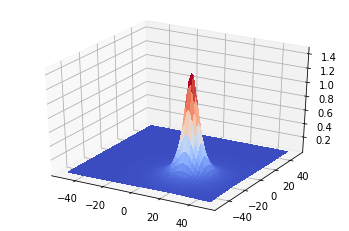

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, G, cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.show()

Waah kerem, eit untuk praktikum ini kita pakai plot 2D dulu saja pakai kontur :D, seperti di bawah ini:

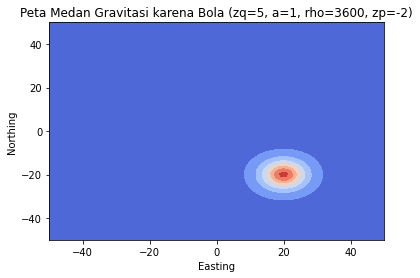

In [27]:
plt.contourf(X,Y,G, cmap=cm.coolwarm)
plt.title("Peta Medan Gravitasi karena Bola (zq=5, a=1, rho=3600, zp=-2)")
plt.ylabel("Northing")
plt.xlabel("Easting")
plt.show()

<div style="background-color: #ffc107  !important; color: grey; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Praktikum Metode Komputasi-5</p>
    <h1>Tugas 5: Array dan Gridding Sederhana dalam Python</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px; padding-bottom: 0px; ">
    <ul>
        <li>Praktikum Metode Komputasi</li>
        <li>Pertemuan: 5</li>
        <li>Format file: Portable Document Format (PDF)</li>
        <li>Template:<a href="./material/report_template.docx"> Download Template Laporan</a></li>
        <li>Link Pengumpulan: Google Classroom</li>
        <li>Format Nama File: 5-[NIM]-Nama, contoh: 5-362705-Anang Sahroni</li>
    </ul>
</div>
<div style="background-color: #dc3545; color: white ">
    <ul>
        <li>Deadline: Minggu, 26 April 2020 17.00 WIB</li>
    </ul>
</div>

Buatlah peta gravitasi seperti di atas tetapi terdapat dua bola kemudian plotlah dalam peta kontur. Setelah itu buatlah sayatan seperti pada gambar di bawah ini. Berilah judul grafik/plot dan kelengkapan grafik yang lainnya.

![tugas5](./material/tugas5.png)